In [528]:
url = "https://data.cityofnewyork.us/resource/fhrw-4uyv.json?$where=created_date%20between%20%272019-03-11T00:00:00%27%20and%20%272019-03-12T00:00:00%27"
data = pd.read_json(url)

In [533]:
data = pd.read_csv("311_311.csv")

In [534]:
data.shape

(1000, 41)

In [535]:
data.head()

,Unnamed: 0,address_type,agency,agency_name,bbl,borough,bridge_highway_direction,bridge_highway_name,bridge_highway_segment,city,...,resolution_description,road_ramp,status,street_name,taxi_company_borough,taxi_pick_up_location,unique_key,x_coordinate_state_plane,y_coordinate_state_plane,resolution_outcome
0,0,ADDRESS,DOHMH,Department of Health and Mental Hygiene,1.002240e+09,MANHATTAN,NaN,NaN,NaN,NEW YORK,...,The Department of Health and Mental Hygiene wi...,NaN,Closed,WATTS STREET,NaN,NaN,41935505,981542.0,203092.0,0
1,1,ADDRESS,DOHMH,Department of Health and Mental Hygiene,1.002240e+09,MANHATTAN,NaN,NaN,NaN,NEW YORK,...,The Department of Health and Mental Hygiene wi...,NaN,Closed,WATTS STREET,NaN,NaN,41929434,981542.0,203092.0,0
2,2,LATLONG,DOHMH,Department of Health and Mental Hygiene,NaN,QUEENS,NaN,NaN,NaN,ELMHURST,...,The Department of Health and Mental Hygiene wi...,NaN,Closed,45 AVENUE,NaN,NaN,41932348,1020716.0,210495.0,0
3,3,ADDRESS,DOHMH,Department of Health and Mental Hygiene,1.020360e+09,MANHATTAN,NaN,NaN,NaN,NEW YORK,...,The Department of Health and Mental Hygiene wi...,NaN,Closed,FREDRICK DOUGLASS BOULEVARD,NaN,NaN,41929359,1001052.0,240370.0,0
4,4,ADDRESS,DOHMH,Department of Health and Mental Hygiene,1.005260e+09,MANHATTAN,NaN,NaN,NaN,NEW YORK,...,The Department of Health and Mental Hygiene wi...,NaN,Closed,MACDOUGAL STREET,NaN,NaN,41936077,983869.0,204858.0,1


In [536]:
data.drop(['Unnamed: 0'], axis=1, inplace=True)

In [537]:
data.columns

Index(['address_type', 'agency', 'agency_name', 'bbl', 'borough',
       'bridge_highway_direction', 'bridge_highway_name',
       'bridge_highway_segment', 'city', 'closed_date', 'community_board',
       'complaint_type', 'created_date', 'cross_street_1', 'cross_street_2',
       'descriptor', 'due_date', 'facility_type', 'incident_address',
       'incident_zip', 'intersection_street_1', 'intersection_street_2',
       'latitude', 'location', 'location_type', 'longitude',
       'open_data_channel_type', 'park_borough', 'park_facility_name',
       'resolution_action_updated_date', 'resolution_description', 'road_ramp',
       'status', 'street_name', 'taxi_company_borough',
       'taxi_pick_up_location', 'unique_key', 'x_coordinate_state_plane',
       'y_coordinate_state_plane', 'resolution_outcome'],
      dtype='object')

In [41]:
data['complaint_type'].value_counts()

HEAT/HOT WATER                         146
Noise - Residential                    117
Illegal Parking                         97
Rodent                                  91
Street Condition                        85
Blocked Driveway                        56
Noise - Commercial                      39
Request Large Bulky Item Collection     33
UNSANITARY CONDITION                    32
Noise                                   25
Noise - Vehicle                         25
Noise - Street/Sidewalk                 22
Traffic Signal Condition                15
Street Light Condition                  14
Non-Emergency Police Matter             13
PAINT/PLASTER                           11
Sanitation Condition                    11
Missed Collection (All Materials)       10
DOOR/WINDOW                              8
PLUMBING                                 8
Derelict Vehicles                        8
Derelict Vehicle                         8
WATER LEAK                               8
ELECTRIC   

In [20]:
data['agency'].value_counts()

NYPD     387
HPD      230
DOT      124
DOHMH    104
DSNY      77
DEP       44
DOB       16
DPR        7
TLC        5
DFTA       2
DCA        2
DHS        1
DOITT      1
Name: agency, dtype: int64

In [13]:
data['complaint_type'][data['agency']=='DOT'].value_counts()

Street Condition              85
Traffic Signal Condition      15
Street Light Condition        14
Ferry Complaint                2
Bus Stop Shelter Complaint     2
Sidewalk Condition             2
Curb Condition                 1
Street Sign - Damaged          1
Ferry Inquiry                  1
Highway Condition              1
Name: complaint_type, dtype: int64

In [18]:
[data['borough'].value_counts()]

[BROOKLYN         360
 QUEENS           219
 BRONX            185
 MANHATTAN        182
 STATEN ISLAND     44
 Unspecified       10
 Name: borough, dtype: int64]

In [841]:
data['complaint_type'][data['borough']=='STATEN ISLAND'].value_counts()

Street Condition                       12
Illegal Parking                         6
Noise - Residential                     6
Electronics Waste                       3
Request Large Bulky Item Collection     2
Animal Abuse                            2
Water System                            2
Derelict Vehicle                        2
Electrical                              1
Street Light Condition                  1
Noise - Vehicle                         1
Rodent                                  1
Overgrown Tree/Branches                 1
Traffic Signal Condition                1
Missed Collection (All Materials)       1
Unsanitary Animal Pvt Property          1
Non-Emergency Police Matter             1
Name: complaint_type, dtype: int64

In [35]:
data['complaint_type'][data['agency']=='DOT'].value_counts()

Street Condition              85
Traffic Signal Condition      15
Street Light Condition        14
Ferry Complaint                2
Sidewalk Condition             2
Bus Stop Shelter Complaint     2
Curb Condition                 1
Ferry Inquiry                  1
Street Sign - Damaged          1
Highway Condition              1
Name: complaint_type, dtype: int64

In [36]:
data['resolution_description'][data['agency']=='DOT'].nunique()

18

In [932]:
data['resolution_description'][data['agency']=='NYPD'].value_counts()

The Police Department responded to the complaint and with the information available observed no evidence of the violation at that time.                                                      136
The Police Department responded to the complaint and took action to fix the condition.                                                                                                        72
The Police Department responded to the complaint and determined that police action was not necessary.                                                                                         50
The Police Department issued a summons in response to the complaint.                                                                                                                          46
The Police Department responded and upon arrival those responsible for the condition were gone.                                                                                               40
The Police Department responded to 

In [45]:
data['resolution_description'].value_counts()

The Police Department responded to the complaint and with the information available observed no evidence of the violation at that time.                                                                                                                                                                                                                                                                                                                                                                 136
The Department of Health and Mental Hygiene will review your complaint to determine appropriate action.  Complaints of this type usually result in an inspection.  Please call 311 in 30 days from the date of your complaint for status                                                                                                                                                                                                                                                                 95
The complaint yo

In [199]:
#positive - + at end
reg = "took action to fix+|summons in response+|provided additional information+|report was prepared+|duplicate of a condition+|advised by a tenant|Violations were issued+|bconducted or attempted+|Violations were previously+|conditions were corrected+|conditions are still open+|within 24 hours+|within 7 days+|warning them+|removed the items+|collected the E-waste+|issued a Notice+|addressed the issue+|collected the requested+|cleaned the location+|picked up the items+|duplicate of a previously+|complainant's request+|it could be closed+|defect found done+|running hydrant+|performed repair work+|no asbestos was+|flush water mains+|replaced the damaged+|resolved the issue+|duplicate to another+|no further action+|were addressed+|issued an Office+|performed the work+|completed the request+|No work is necessary+|visit the location+|repaired the problem+|request is available on+|You can find additional information+|meets resurfacing+|problem was fixed+|has been completed+|to address the issue+|valid permit+|defect was found+"


In [200]:
data['resolution_outcome'] = bool([re.search(reg, str(x)) for x in data['resolution_description']])

In [266]:
data['resolution_outcome'].value_counts()

0    614
1    386
Name: resolution_outcome, dtype: int64

Target Variable
0    614
1    386
Name: resolution_outcome, dtype: int64


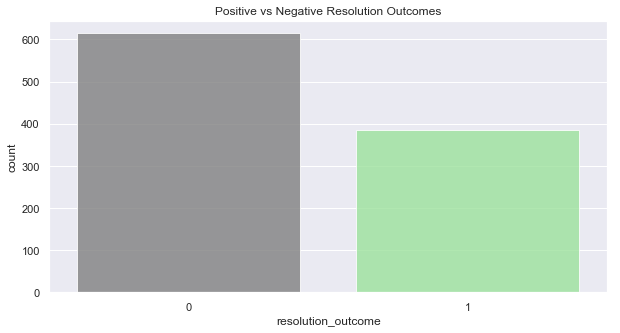

In [363]:
# Default Count
print('Target Variable')
print(data['resolution_outcome'].value_counts())
# print(data.groupby(['default payment next month']).SEX.count())

# To get a sense of the data
sns.set_style('darkgrid')
plt.figure(figsize = (10,5))
sns.countplot(data['resolution_outcome'], alpha =.80, palette= ['grey','lightgreen'])
plt.title('Positive vs Negative Resolution Outcomes')
# plt.ylabel('# ')
plt.show()

In [275]:
print(data.groupby(['borough','resolution_outcome']).borough.count().unstack())
pclass = data.groupby(['borough','resolution_outcome']).borough.count().unstack()

resolution_outcome    0    1
borough                     
BRONX               110   75
BROOKLYN            232  128
MANHATTAN           119   63
QUEENS              131   88
STATEN ISLAND        18   26
Unspecified           4    6


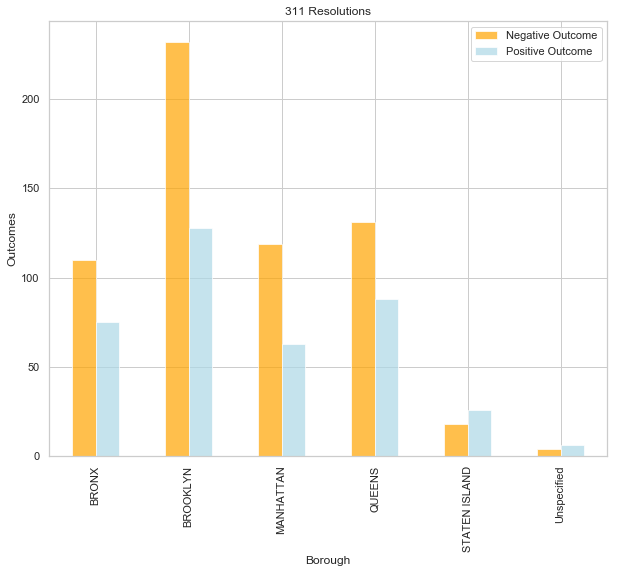

In [348]:
# plt.figure(figsize = (200,100))
p1 = pclass.plot(kind = 'bar', stacked = False, 
                   title = '311 Resolutions', 
                   color = ['orange','lightblue'], alpha = .70,figsize = (10,8))
p1.set_xlabel('Borough')
p1.set_ylabel('Outcomes')
p1.legend(['Negative Outcome','Positive Outcome'])
plt.show()

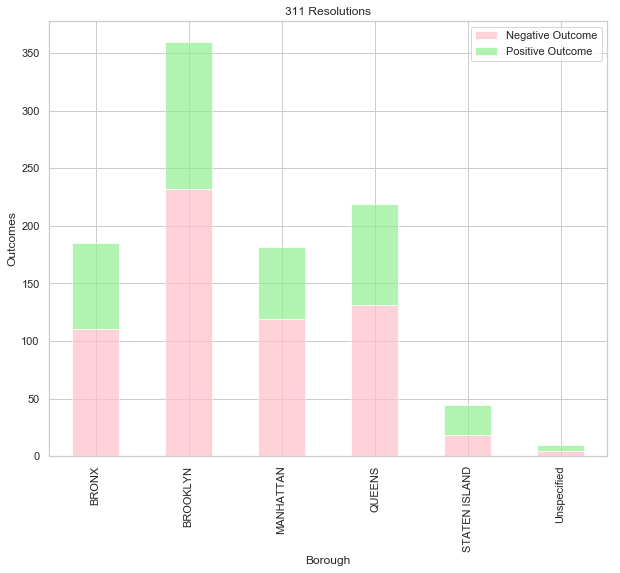

In [370]:
# plt.figure(figsize = (200,100))
p1 = pclass.plot(kind = 'bar', stacked = True, 
                   title = '311 Resolutions', 
                   color = ['pink','lightgreen'], alpha = .70,figsize = (10,8))
p1.set_xlabel('Borough')
p1.set_ylabel('Outcomes')
p1.legend(['Negative Outcome','Positive Outcome'])
plt.show()

In [288]:
print(data.groupby(['agency','resolution_outcome']).borough.count().unstack())
pclass1 = data.groupby(['agency','resolution_outcome']).borough.count().unstack()

resolution_outcome      0      1
agency                          
DCA                   NaN    2.0
DEP                  29.0   15.0
DFTA                  NaN    2.0
DHS                   1.0    NaN
DOB                   1.0   15.0
DOHMH                97.0    7.0
DOITT                 NaN    1.0
DOT                  14.0  110.0
DPR                   3.0    4.0
DSNY                 53.0   24.0
HPD                 155.0   75.0
NYPD                256.0  131.0
TLC                   5.0    NaN


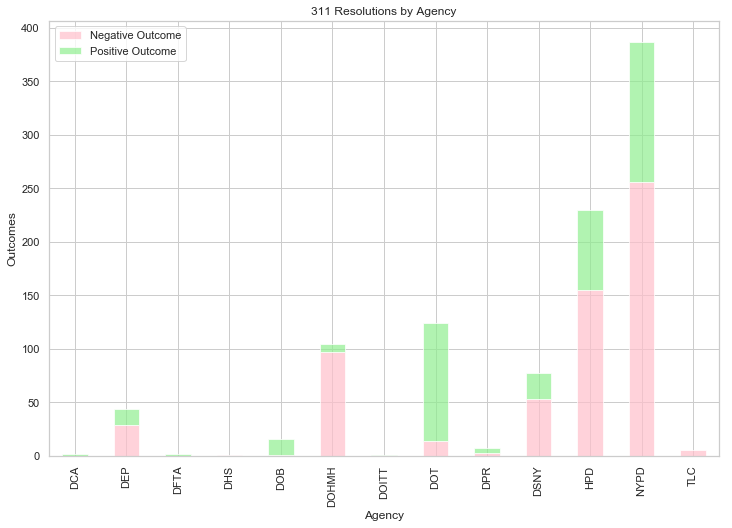

In [412]:
p1 = pclass1.plot(kind = 'bar', stacked = True, 
                   title = '311 Resolutions by Agency', 
                   color = ['pink','lightgreen'], alpha = .70, figsize = (12,8))
p1.set_xlabel('Agency')
p1.set_ylabel('Outcomes')
p1.legend(['Negative Outcome','Positive Outcome'])
plt.show();

<function seaborn.utils.load_dataset(name, cache=True, data_home=None, **kws)>

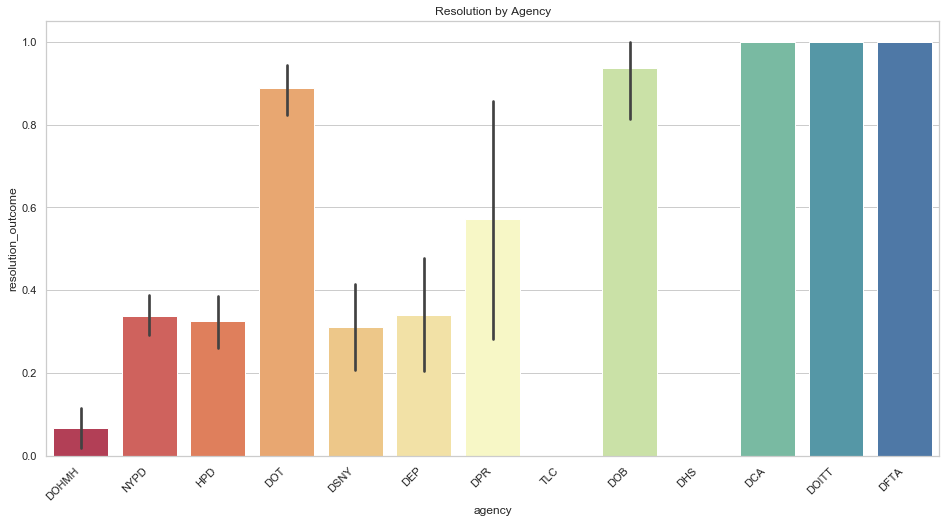

In [369]:
# sns.catplot(x='borough', y='agency', data=data)
# catplot(x='created_date', y='count_zip_code', kind="box", data=season_plot);
plt.figure(figsize = (16, 8))
sns.set_context('poster') 
sns.set(style="whitegrid")
ax = sns.barplot(x="agency", y="resolution_outcome", data=data, palette='Spectral')
ax.set_title("Resolution by Agency")
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha="right")
sns.load_dataset

<function seaborn.utils.load_dataset(name, cache=True, data_home=None, **kws)>

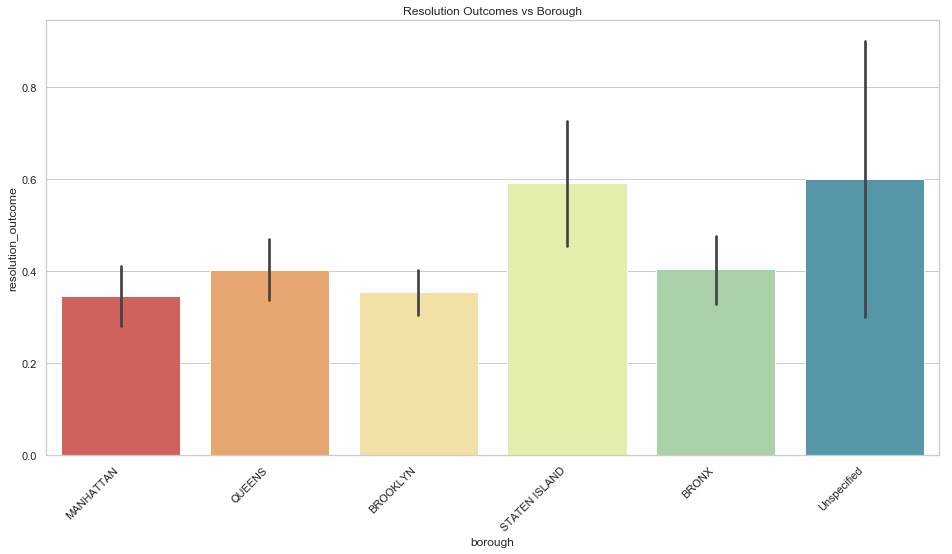

In [372]:
# sns.catplot(x='borough', y='agency', data=data)
# catplot(x='created_date', y='count_zip_code', kind="box", data=season_plot);
plt.figure(figsize = (16, 8))
sns.set_context('poster') 
sns.set(style="whitegrid")
ax = sns.barplot(x="borough", y="resolution_outcome", data=data, palette='Spectral')
ax.set_title("Resolution Outcomes vs Borough")
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha="right")
sns.load_dataset

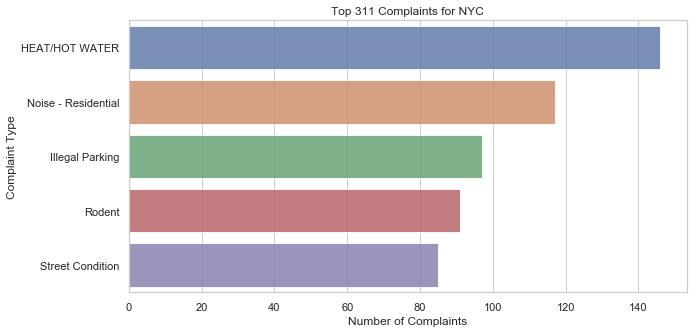

In [920]:
complaint_count  = data['complaint_type'].value_counts()
complaint_count = complaint_count[:5,]
plt.figure(figsize=(10,5))
sns.barplot(complaint_count.values, complaint_count.index, alpha=0.8)
plt.title('Top 311 Complaints for NYC')
plt.ylabel('Complaint Type', fontsize=12)
plt.xlabel('Number of Complaints', fontsize=12)
plt.show()

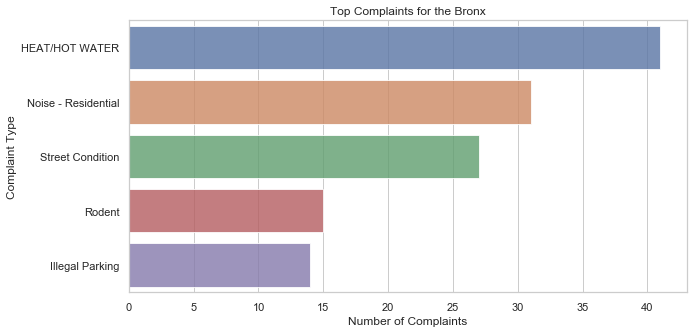

In [922]:
complaint_count  = data['complaint_type'][data['borough']=='BRONX'].value_counts()
complaint_count = complaint_count[:5,]
plt.figure(figsize=(10,5))
sns.barplot(complaint_count.values, complaint_count.index, alpha=0.8)
plt.title('Top Complaints for the Bronx')
plt.ylabel('Complaint Type', fontsize=12)
plt.xlabel('Number of Complaints', fontsize=12)
plt.show()

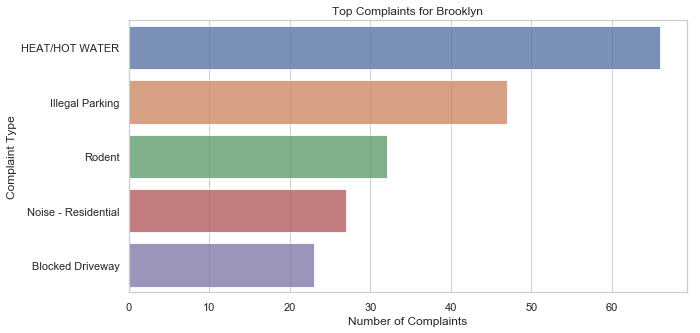

In [924]:
complaint_count  = data['complaint_type'][data['borough']=='BROOKLYN'].value_counts()
complaint_count = complaint_count[:5,]
plt.figure(figsize=(10,5))
sns.barplot(complaint_count.values, complaint_count.index, alpha=0.8)
plt.title('Top Complaints for Brooklyn')
plt.ylabel('Complaint Type', fontsize=12)
plt.xlabel('Number of Complaints', fontsize=12)
plt.show()

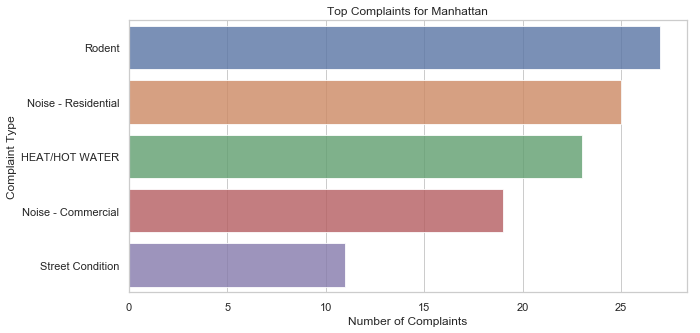

In [925]:
complaint_count  = data['complaint_type'][data['borough']=='MANHATTAN'].value_counts()
complaint_count = complaint_count[:5,]
plt.figure(figsize=(10,5))
sns.barplot(complaint_count.values, complaint_count.index, alpha=0.8)
plt.title('Top Complaints for Manhattan')
plt.ylabel('Complaint Type', fontsize=12)
plt.xlabel('Number of Complaints', fontsize=12)
plt.show()

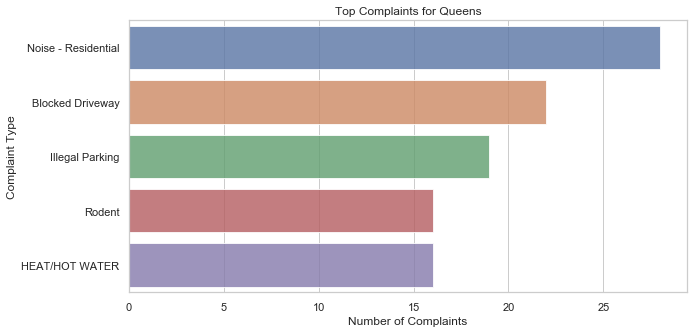

In [926]:
complaint_count  = data['complaint_type'][data['borough']=='QUEENS'].value_counts()
complaint_count = complaint_count[:5,]
plt.figure(figsize=(10,5))
sns.barplot(complaint_count.values, complaint_count.index, alpha=0.8)
plt.title('Top Complaints for Queens')
plt.ylabel('Complaint Type', fontsize=12)
plt.xlabel('Number of Complaints', fontsize=12)
plt.show()

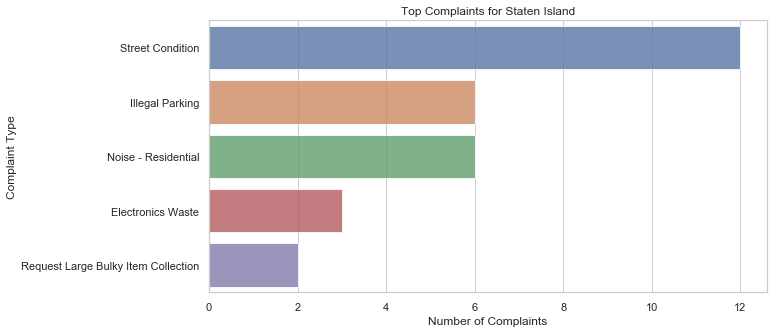

In [927]:
complaint_count  = data['complaint_type'][data['borough']=='STATEN ISLAND'].value_counts()
complaint_count = complaint_count[:5,]
plt.figure(figsize=(10,5))
sns.barplot(complaint_count.values, complaint_count.index, alpha=0.8)
plt.title('Top Complaints for Staten Island')
plt.ylabel('Complaint Type', fontsize=12)
plt.xlabel('Number of Complaints', fontsize=12)
plt.show()

# Location Heatmap

In [ ]:
#40.7128° N, 74.0060° W  NYC

In [777]:
import folium
from folium import plugins

In [783]:
divvyStations = ndata[['agency', 'borough', 'complaint_type', 'latitude', 'longitude', 'resolution_outcome']]
divvyStations.head()

,agency,borough,complaint_type,latitude,longitude,resolution_outcome
0,DOHMH,MANHATTAN,Rodent,40.724117,-74.009770,0
1,DOHMH,MANHATTAN,Rodent,40.724117,-74.009770,0
2,DOHMH,QUEENS,Rodent,40.744362,-73.868400,0
3,DOHMH,MANHATTAN,Rodent,40.826420,-73.939289,0
4,DOHMH,MANHATTAN,Food Poisoning,40.728965,-74.001375,1


In [787]:
divvyStations.shape

(1000, 6)

In [788]:
divvyStations.dropna(inplace=True)

/Users/fhel/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [789]:
divvyStations.shape

(972, 6)

In [779]:
m = folium.Map([40.7128, -74.0060], zoom_start=11)
m

In [790]:
# mark each station as a point
for index, row in divvyStations.iterrows():
    folium.CircleMarker([row['latitude'], row['longitude']],
                        radius=15,
                        popup=row['complaint_type'],
                        fill_color="#3db7e4", # divvy color
                       ).add_to(m)

In [791]:
# convert to (n, 2) nd-array format for heatmap
stationArr = divvyStations[['latitude', 'longitude']].as_matrix()

# plot heatmap
m.add_children(plugins.HeatMap(stationArr, radius=15))
m

/Users/fhel/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  
/Users/fhel/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: FutureWarning: Method `add_children` is deprecated. Please use `add_child` instead.
  """


In [795]:
rodent = data.loc[df['complaint_type'] == 'Rodent']

In [796]:
rodent.shape

(91, 40)

In [797]:
divvyStations = rodent[['agency', 'borough', 'complaint_type', 'latitude', 'longitude', 'resolution_outcome']]

In [798]:
m = folium.Map([40.7128, -74.0060], zoom_start=11)

In [802]:
# mark each station as a point
for index, row in divvyStations.iterrows():
    folium.CircleMarker([row['latitude'], row['longitude']],
                        radius=15,
                        popup=row['complaint_type'],
                        fill_color="#3db7e4", # divvy color
                       ).add_to(m)

In [803]:
# convert to (n, 2) nd-array format for heatmap
stationArr = divvyStations[['latitude', 'longitude']].as_matrix()

# plot heatmap
m.add_children(plugins.HeatMap(stationArr, radius=15))
m

/Users/fhel/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  
/Users/fhel/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: FutureWarning: Method `add_children` is deprecated. Please use `add_child` instead.
  """


Heat/Hot Water

In [807]:
heat = data.loc[df['complaint_type'] == 'HEAT/HOT WATER']

In [806]:
divvyStations = heat[['agency', 'borough', 'complaint_type', 'latitude', 'longitude', 'resolution_outcome']]
m = folium.Map([40.7128, -74.0060], zoom_start=11)

In [805]:
# mark each station as a point
for index, row in divvyStations.iterrows():
    folium.CircleMarker([row['latitude'], row['longitude']],
                        radius=15,
                        popup=row['complaint_type'],
                        fill_color="#3db7e4", # divvy color
                       ).add_to(m)

In [808]:
# convert to (n, 2) nd-array format for heatmap
stationArr = divvyStations[['latitude', 'longitude']].as_matrix()

# plot heatmap
m.add_children(plugins.HeatMap(stationArr, radius=15))
m

/Users/fhel/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  
/Users/fhel/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: FutureWarning: Method `add_children` is deprecated. Please use `add_child` instead.
  """


In [809]:
noise = data.loc[df['complaint_type'] == 'Noise - Residential']

In [ ]:
divvyStations = noise[['agency', 'borough', 'complaint_type', 'latitude', 'longitude', 'resolution_outcome']]
m = folium.Map([40.7128, -74.0060], zoom_start=11)

In [810]:
# mark each station as a point
for index, row in divvyStations.iterrows():
    folium.CircleMarker([row['latitude'], row['longitude']],
                        radius=15,
                        popup=row['complaint_type'],
                        fill_color="#3db7e4", # divvy color
                       ).add_to(m)

In [811]:
# convert to (n, 2) nd-array format for heatmap
stationArr = divvyStations[['latitude', 'longitude']].as_matrix()

# plot heatmap
m.add_children(plugins.HeatMap(stationArr, radius=15))
m

/Users/fhel/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  
/Users/fhel/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: FutureWarning: Method `add_children` is deprecated. Please use `add_child` instead.
  """


PoPo

In [819]:
popo = data.loc[df['agency'] == 'NYPD']

In [820]:
divvyStations = popo[['agency', 'borough', 'complaint_type', 'latitude', 'longitude', 'resolution_outcome']]
m = folium.Map([40.7128, -74.0060], zoom_start=11)

In [822]:
divvyStations.dropna(inplace=True)
divvyStations.shape

/Users/fhel/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


(386, 6)

In [823]:
# mark each station as a point
for index, row in divvyStations.iterrows():
    folium.CircleMarker([row['latitude'], row['longitude']],
                        radius=15,
                        popup=row['complaint_type'],
                        fill_color="#3db7e4", # divvy color
                       ).add_to(m)

In [824]:
# convert to (n, 2) nd-array format for heatmap
stationArr = divvyStations[['latitude', 'longitude']].as_matrix()

# plot heatmap
m.add_children(plugins.HeatMap(stationArr, radius=15))
m

/Users/fhel/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  
/Users/fhel/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: FutureWarning: Method `add_children` is deprecated. Please use `add_child` instead.
  """
